In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Dictionary**

- PassengerId = id pada row, tidak berpengaruh terhadap target
- Survived = target yang akan diprediksi (0 = Not Survived dan 1 = Survived)
- Pclass (Passenger Class) = kategori level sosial ekonomi penumpang (1 = Upper Class, 2 = Middle Class, 3 = Lower Class)
- Name, Sex dan Age merupakan data self-explanatory
- SibSp = jumlah saudara dari penumpang
- Parch = jumlah Orang Tua dan anak dari penumpang
- Ticket = jumlah tiket penumpang
- Fare = tarif yang di kenakan kepada penumpang
- Cabin = nomor kabin penumpang
- Embarked = pelabuhan pemberangkatan (C = Cherbourg, Q = Queenstown, S = Southampton)

# **Exploratory Data Analysis**

**Cek Dimensi Data**

In [3]:
print('Nama kolom: ', df.columns)
print('\n')
print('Ukuran data: ', df.shape)

Nama kolom:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Ukuran data:  (891, 12)


**Cek Deskripsi Data**

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Cek Missing Value**

In [5]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

dari 891 baris data yang ada, kolom Embarked, Cabin, dan Age berjumlah tidak lengkap yang menandakan adanya missing value pada kolom tersebut.

**Cek Korelasi Antar fitur**

In [6]:
df_corr = df.corr().abs()
print(df_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


dari nilai koefisien korelasi yang dihasilkan, variabel target (Survived) memiliki nilai korelasi yang tinggi dengan fitur Pclass dan Fare. Dapat diasumsikan bahwa kebanyakan orang yang selamat adalah orang dengan Pclass atas.

Sedangkan fitur Age memiliki korelasi yang tinggi dengan variabel Pclass, Sibling Spouse (SibSp), dan Parent Children (Parch). Dapat diasumsikan bahwa Tuanya umur seseorang dapat dikatakan dia akan membawa saudara/orang tua/anak/pasangan.

Fare (harga) tentu saja berkaitan dengan Pclass (kelas penumpang) seorang penumpang.

**Imputasi Data terhadap Missing Value**

Untuk mengisi data Age yang kosong, dapat mengisinya dengan nilai tengah umur seseorang di dalam kelas tersebut dan berdasarkan jenis kelaminnya.

Oleh karena itu, perlu dilakukan groupby terhadap Jenis Kelamin dan Kelas Penumpang, lalu isi nilai tersebut ke dalam missing value yang ada di dalam kolom Age. groupby dilakukan terhadap kelas penumpang karena berdasarkan nilai koefisien korelasi yang ada, Age memiliki hubungan dengan kelas penumpang

In [7]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers {}'.format(df['Age'].median()))

df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers 28.0


Untuk kolom Embarked, kebanyakan orang dari Titanic berangkat dari Southampton/S. Oleh karena itu, missing value pada kolom Embarked dapat diisi dengan S saja.

In [8]:
df['Embarked'] = df['Embarked'].fillna('S')

**Explore Data**

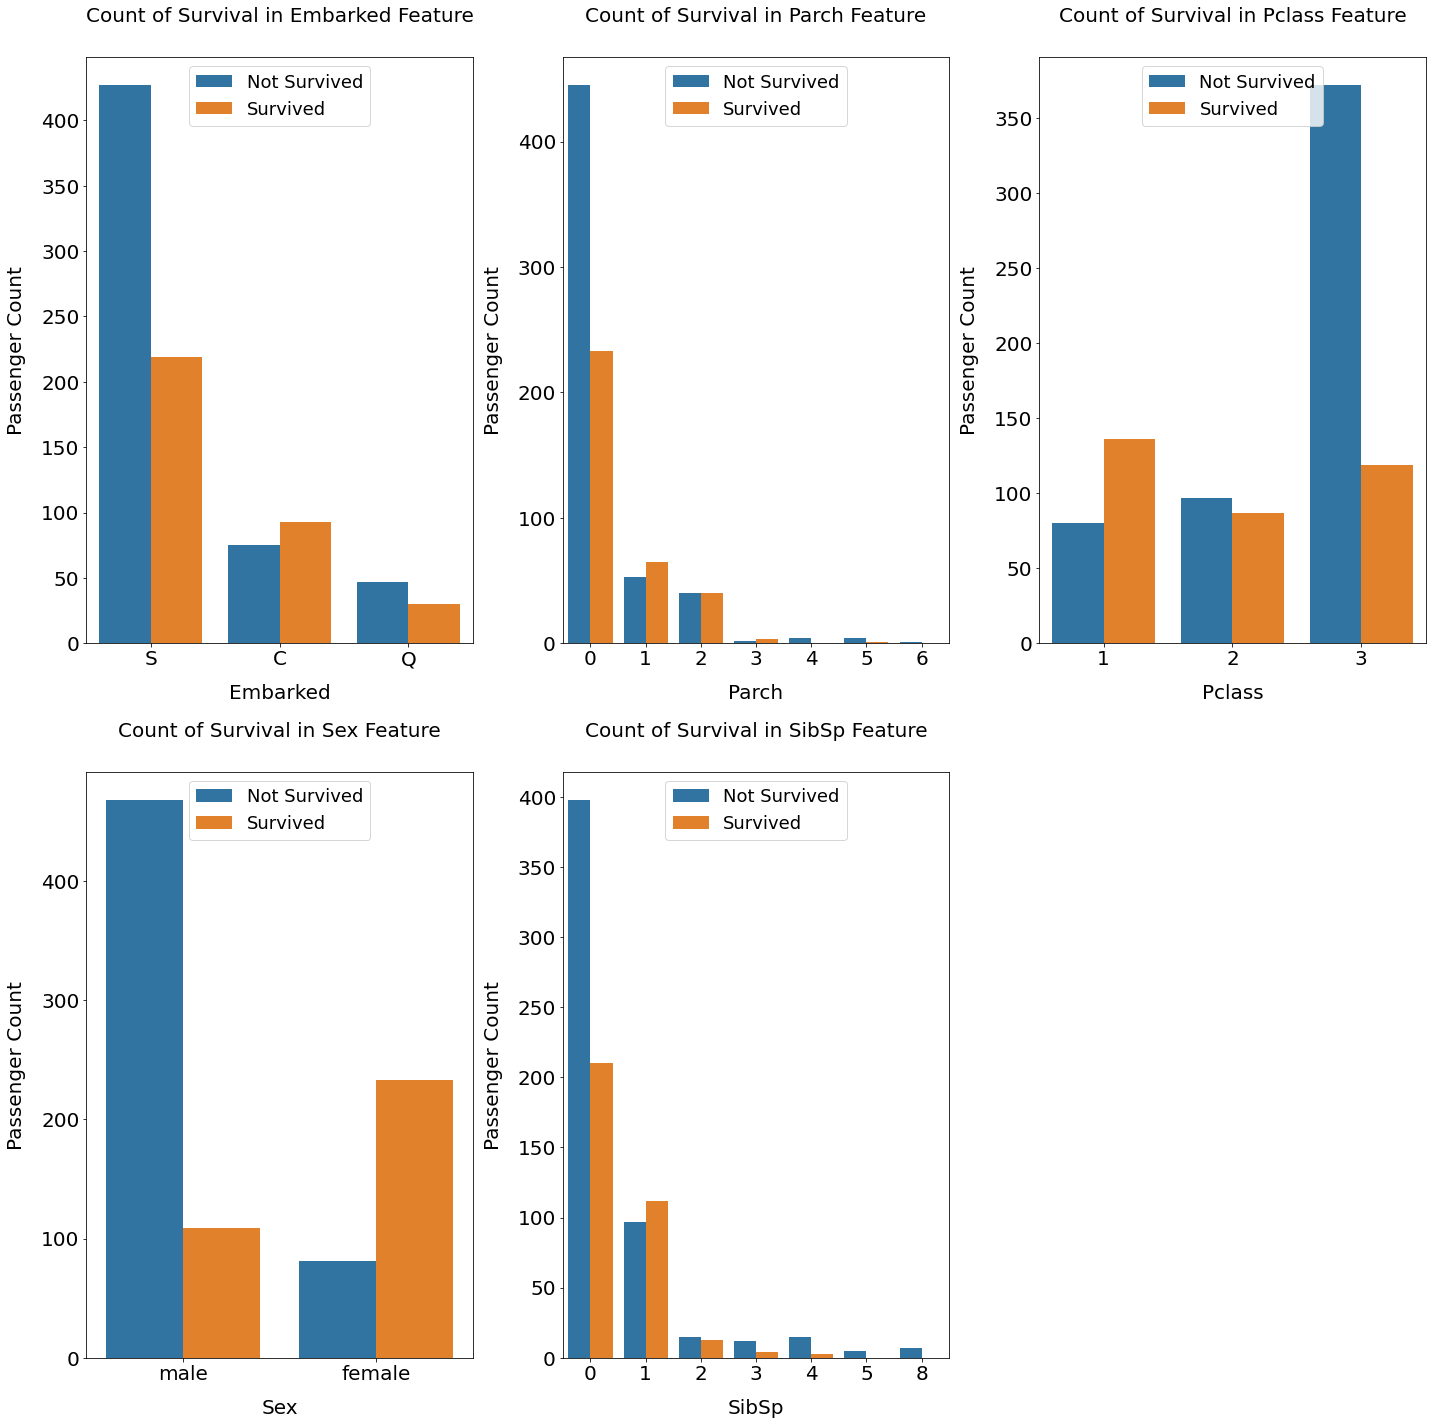

In [9]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.tight_layout()
plt.show()

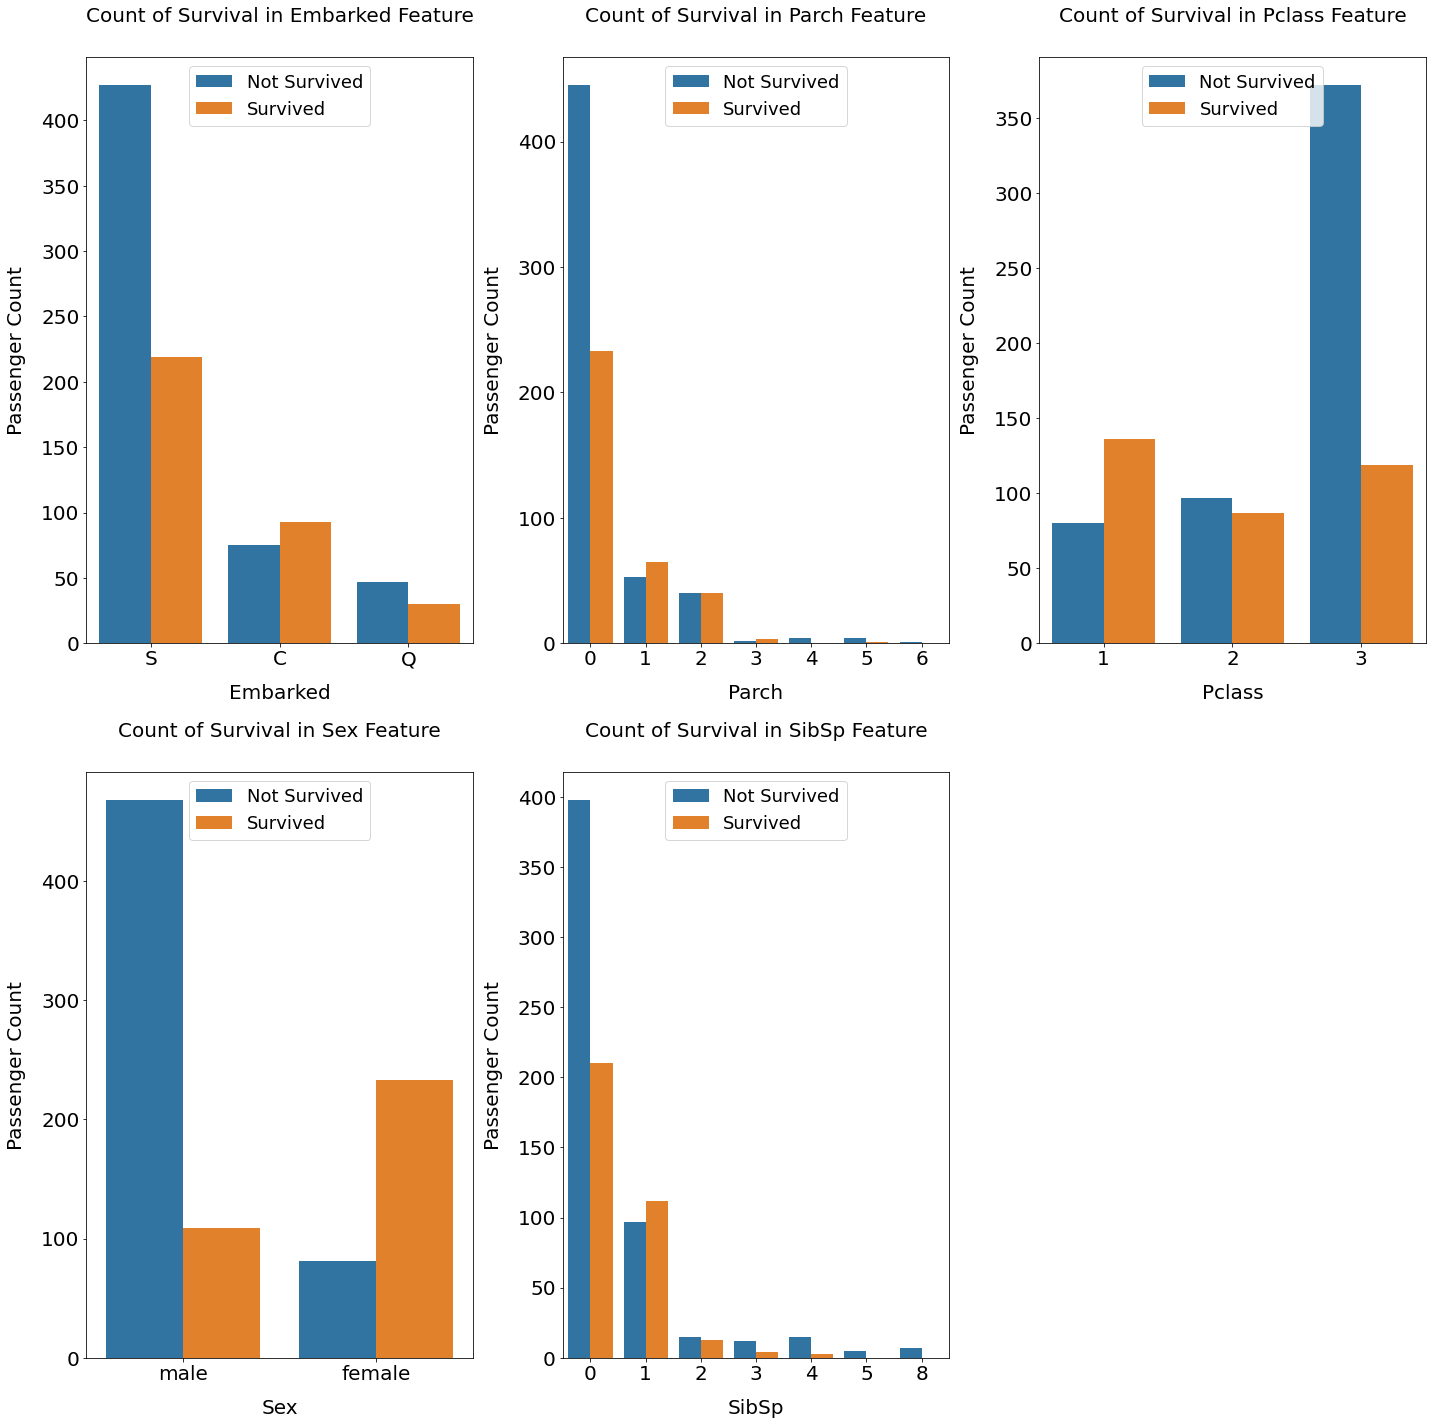

In [10]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.tight_layout()

# Menyimpan gambar ke dalam file
plt.savefig('visualization Survival.png')
plt.show()

- Dari bar plot di atas, terlihat bahwa penumpang yang berangkat dari pelabuhan Southampton (S) lebih banyak yang selamat dan penumpang yang berangkat dari pelabuhan Queenstown (Q) paling sedikit yang selamat

- Penumpang individu serta yang hanya membawa 1 orang tua/anak lebih banyak yang selamat

- Penumpang dengan kelas 1 (Upper Class) lebih banyak yang selamat dan kelas 3 (Lower Class) paling sedikit yang selamat

- Penumpang perempuan lebih banyak yang selamat

- Penumpang yang tidak membawa sibling/spouse atau hanya membawa 1 sibling/Spouse kemungkinan selamatnya lebih besar

Data Fare dan Age akan dibagi ke dalam beberapa grup.

Berdasarkan fungsi describe sebelumnya, diketahui bahwa minimal usia adalah 0.42 tahun dan yang tertua adalah 80 tahun, sehingga membaginya dengan 13 kelompok quantile cukup.

Untuk Fare, yang termurah adalah 0 dan termahal adalah 512, sehingga membaginya dengan 10 kelompok quantile sudah cukup.

#Note: Untuk pembagian jumlah grup yang berbeda baik 13 grup untuk "Age" dan 10 grup untuk "Fare" tidak aturan bakunya. Tetapi yang diinginkan dari visualisasi berdasarkan pembagian dengan jumlah bins adalah sebaran datanya. 

Sebagai contoh untuk "Age" yang memiliki range data 0 (min) s/d 80 (max). Untuk itu, awalnya membagi data menjadi 8 bins katakanlah cukup untuk mereprsentasikan sebaran data. Ketika setelah dicek dengan visualisasi sebarannya belum mewakili dan adanya skew. Selanjutnya, kita dapat menaikkan/menurunkan jumlah grup untuk melihat sebaran data berikut. Untuk "Age" ini terpilihlah 13 grup yang cocok untuk mepresentasikan sebaran data. Dengan cara yang sama dapat juga diterapkan untuk "Fare".

Jadi tidak ada aturan baku yang mengatur jumlah grup tersebut.

<function matplotlib.pyplot.show(close=None, block=None)>

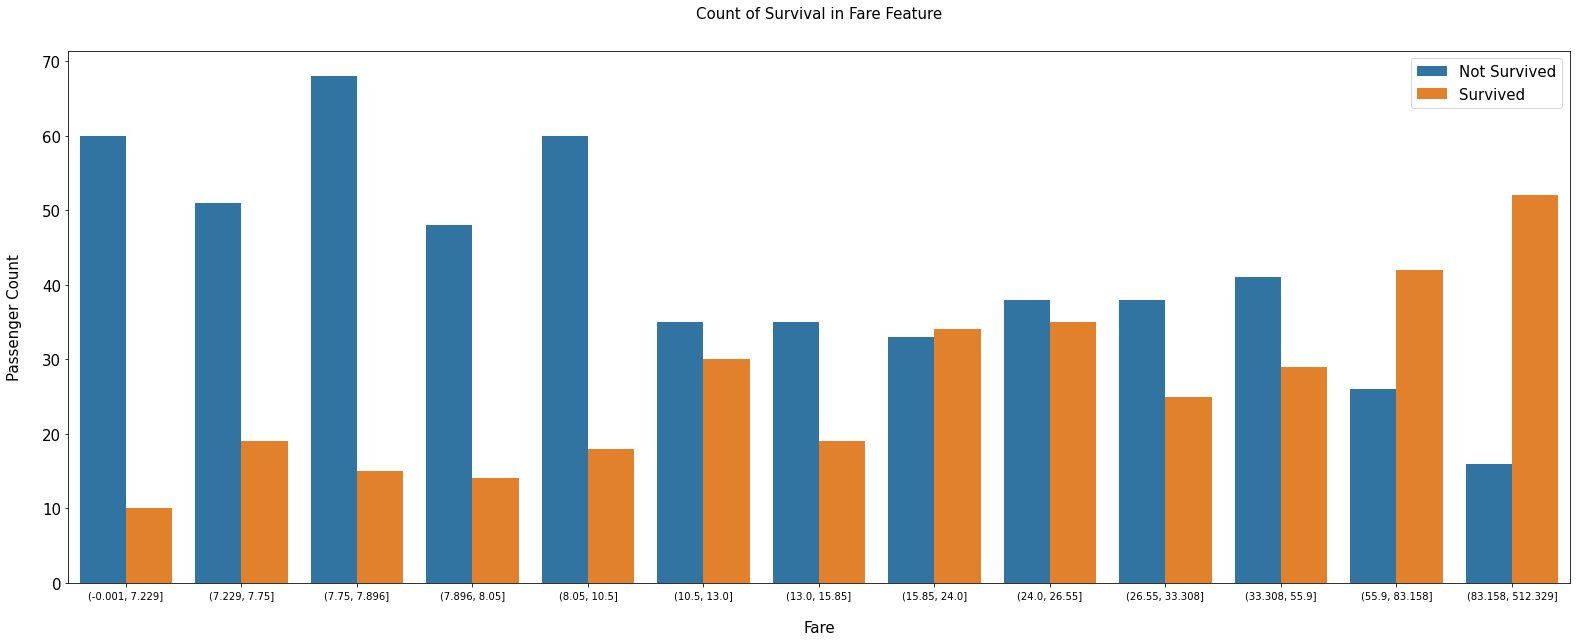

In [11]:
df['Fare'] = pd.qcut(df['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.tight_layout()
plt.savefig('Fare.png')
plt.show

Dari hasil visualisasi di atas dapat terlihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas. Tetapi, banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742.

# Feature Engineering

Fitur yang pertama dibuat adalah Family_Size yang merupakan gabungan dari Parent, Children, Sibling, dan Spouse. Kemudian ditambahkan 1 dengan asumsi menghitung individu penumpang tersebut.

Fitur kedua yang kita buat adalah menggabungkan Family_Size dengan groupnya masing-masing tergantung jumlahnya dengan kategorinya adalah seperti berikut:
- Family Size 1 = Alone
- Family Size 2, 3 dan 4 = Small
- Family Size 5 dan 6 = Medium
- Family Size 7, 8 dan 11 = Large

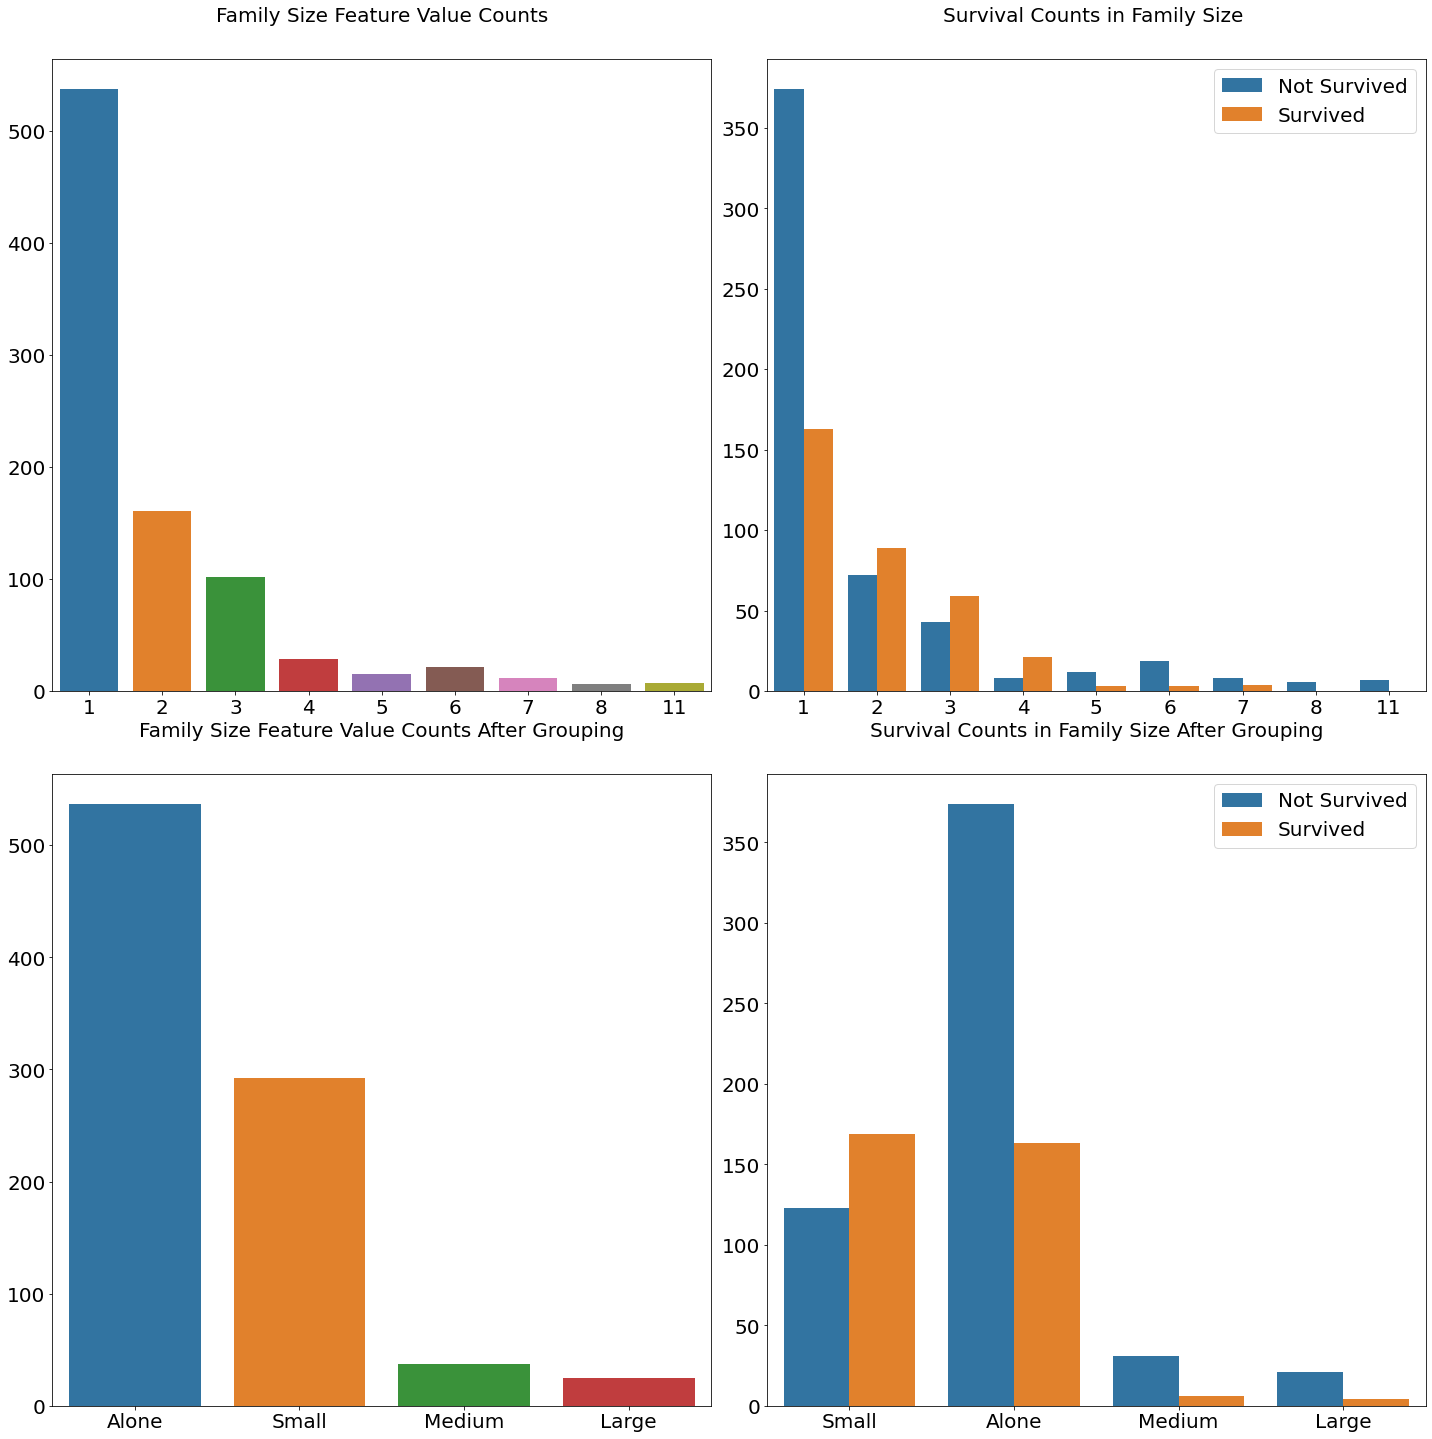

In [12]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df['Family_Size'].value_counts().index, y=df['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df['Family_Size_Grouped'] = df['Family_Size'].map(family_map)

sns.barplot(x=df['Family_Size_Grouped'].value_counts().index, y=df['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.tight_layout()
plt.savefig('Family size grouped.png')
plt.show()

Berdasarkan bar plot di atas, terlihat bahwa orang yang sendirian serta dengan Family_Size 2,3,4 (Small) mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan Family_Size_Grouped Small serta sendirian lebih terlihat mempunyai tingkat keselamatan lebih besar.

Jika diperhatikan, kolom name memiliki pola yang sama, yaitu: 
[Nama_belakang], [Jabatan]. [Nama_depan] .

Oleh karena itu, bisa diambil jabatannya saja dengan mengambil kata setelah tanda koma "," dan sebelum tanda titik "." .
Dari sini akan menghadilkan fitur baru dengan nama 'Title' yang berisi jabatan penumpang.

In [13]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(df['Title'].unique())

df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1 #jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah

print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


C:\Users\user\AppData\Local\Temp\ipykernel_7496\2279694819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1 #jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah


Jabatan yang paling umum adalah Mr, Mrs. , dan Miss. Ternyata ada banyak sekali jabatan lain dan akan dikelompokkan menjadi satu. 

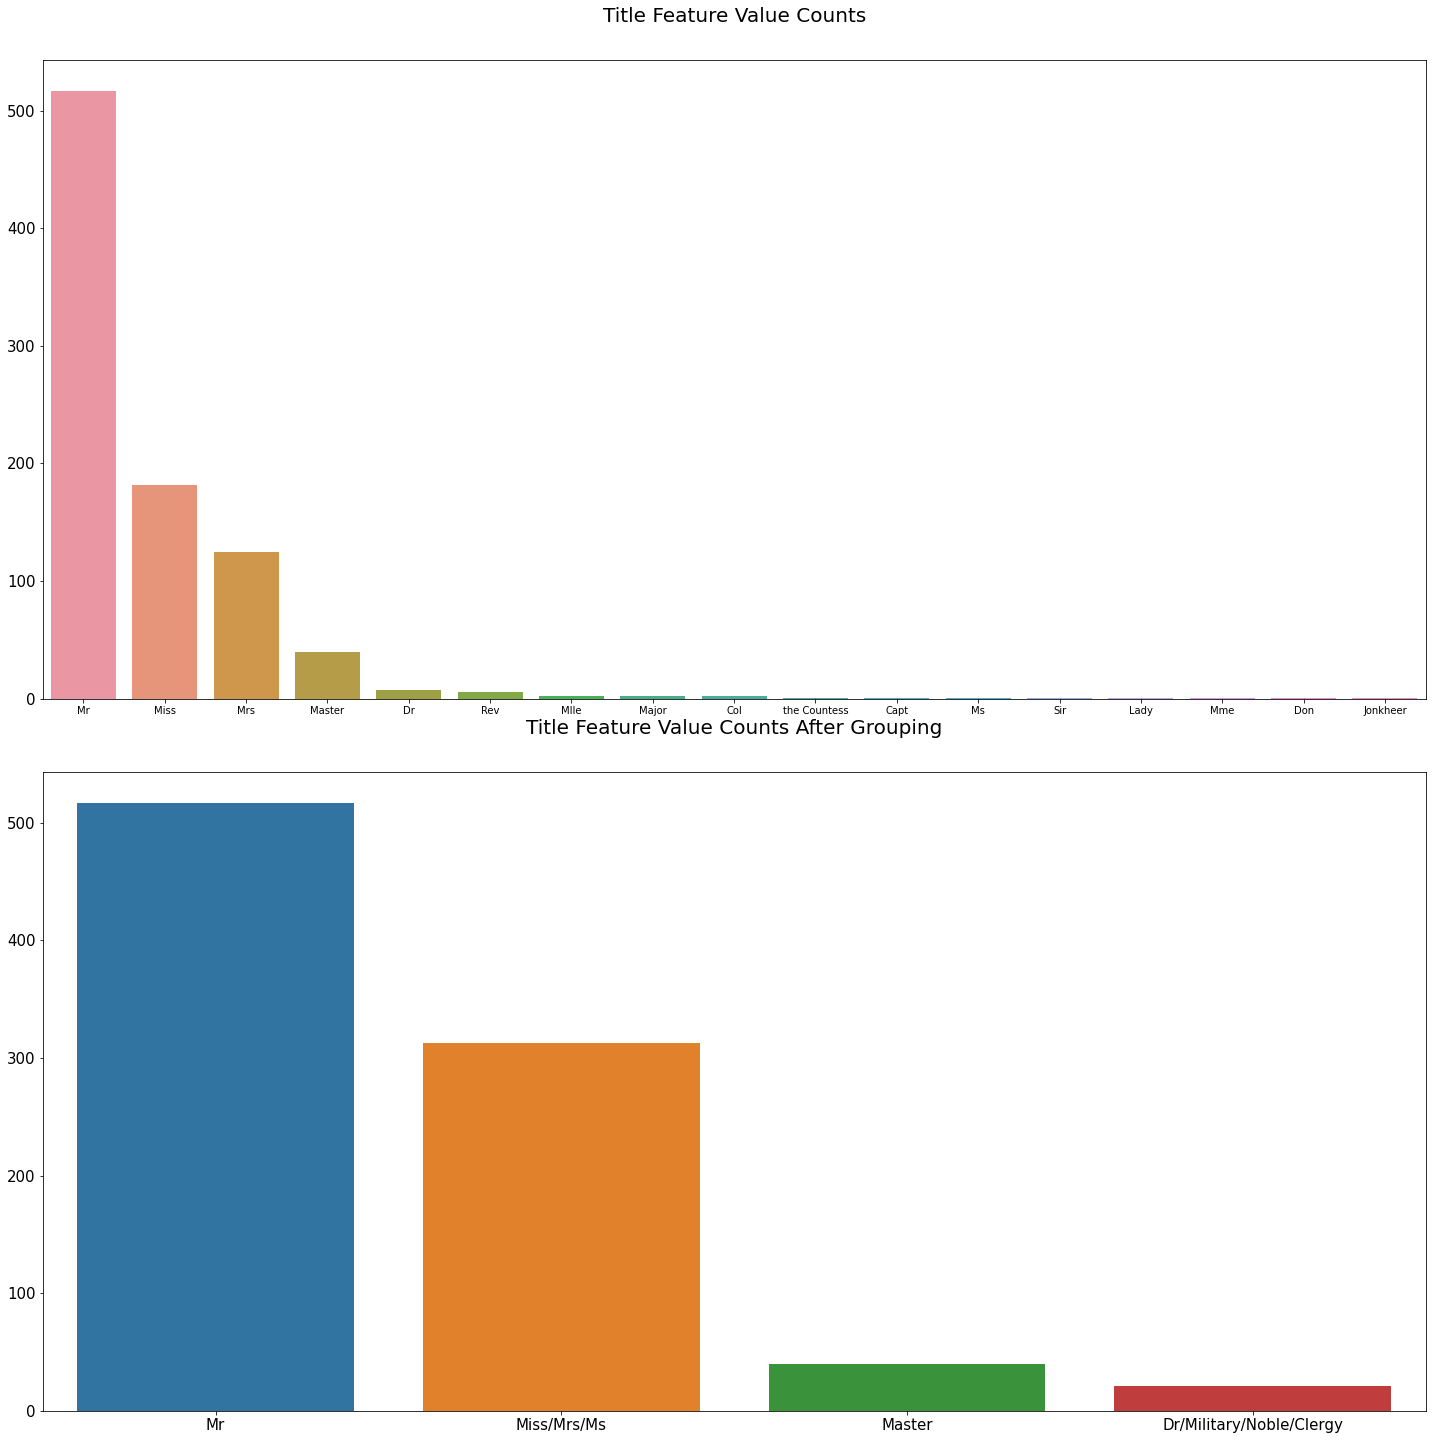

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df['Title'] = df['Title'].replace(['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df['Title'].value_counts().index, y=df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)
plt.tight_layout()
plt.savefig('family_size_visualization.png')
plt.show()

In [15]:
df['Title'].unique()

array(['Mr', 'Miss/Mrs/Ms', 'Master', 'Dr/Military/Noble/Clergy'],
      dtype=object)

In [16]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,"(7.229, 7.75]",NaN,S,2,Small,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,"(55.9, 83.158]",C85,C,2,Small,Miss/Mrs/Ms,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,"(7.896, 8.05]",NaN,S,1,Alone,Miss/Mrs/Ms,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,"(33.308, 55.9]",C123,S,2,Small,Miss/Mrs/Ms,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,"(7.896, 8.05]",NaN,S,1,Alone,Mr,0
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,"(8.05, 10.5]",NaN,Q,1,Alone,Mr,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,"(33.308, 55.9]",E46,S,1,Alone,Mr,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,"(15.85, 24.0]",NaN,S,5,Medium,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,"(10.5, 13.0]",NaN,S,3,Small,Miss/Mrs/Ms,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,"(26.55, 33.308]",NaN,C,2,Small,Miss/Mrs/Ms,1


**Label Encoder**

In [17]:
#LabelEncoder untuk data” yang bersifat non-numeric, tujuannya adalah melakukan encoding [0-n] untuk data kategorikal

from sklearn.preprocessing import LabelEncoder

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']
label_encoder = LabelEncoder()

for column in non_numeric_features:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
#mengubah feature kategori menjadi one hot, dengan OneHotEncoder. Akan menghasilkan beberapa kolom tergantung banyaknya kategori. Contohnya Pclass akan menjadi 3 kolom Pclass_1, Pclass_2, dan Pclass_3. Isinya adalah 0 dan 1 tergantung kategori orang tersebut

from sklearn.preprocessing import OneHotEncoder

cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for index, row in df.iterrows():
    encoded_row = {}
    for feature in cat_features:
        # Buat objek OneHotEncoder dan lakukan transformasi pada nilai kolom yang diinginkan
        value = row[feature]  # Ambil nilai kolom
        encoded_feat = OneHotEncoder().fit_transform([[value]]).toarray()  # Lakukan transformasi
        n = int(value)  # Konversi nilai ke integer
        cols = ['{}_{}'.format(feature, n) for n in range(1, encoded_feat.shape[1] + 1)]
        encoded_row.update(dict(zip(cols, encoded_feat[0])))
    encoded_features.append(encoded_row)

encoded_df = pd.DataFrame(encoded_features)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",1,29,1,0,A/5 21171,1,NaN,2,2,3,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,52,1,0,PC 17599,11,C85,0,2,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,35,0,0,STON/O2. 3101282,3,NaN,2,1,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,10,C123,2,2,3,2,1
4,5,0,3,"Allen, Mr. William Henry",1,48,0,0,373450,3,NaN,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,36,0,0,211536,5,NaN,2,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,24,0,0,112053,9,B42,2,1,0,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28,1,2,W./C. 6607,7,NaN,2,4,3,2,0
889,890,1,1,"Behr, Mr. Karl Howell",1,35,0,0,111369,9,C148,0,1,0,3,0


# Modelling dengan Hasil Feature Engineering

In [20]:
#drop terhadap kolom-kolom yang tidak kita perlukan

df_fix = df.copy()
drop_cols = ['Cabin', 'Embarked', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket']

df_fix.drop(columns=drop_cols, inplace=True)

print(df_fix.head())

   Survived  Age  SibSp  Parch  Fare  Family_Size  Family_Size_Grouped  Title  \
0         0   29      1      0     1            2                    3      3   
1         1   52      1      0    11            2                    3      2   
2         1   35      0      0     3            1                    0      2   
3         1   48      1      0    10            2                    3      2   
4         0   48      0      0     3            1                    0      3   

   Is_Married  
0           0  
1           1  
2           0  
3           1  
4           0  


In [21]:
from sklearn.model_selection import train_test_split

X = df_fix.drop('Survived', axis=1)
y = df_fix['Survived']

# Melakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, oob_score=True, random_state=50)

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86111111 0.81944444 0.71830986 0.91549296 0.81690141 0.70422535
 0.8028169  0.81690141 0.77464789 0.91549296]
Mean: 0.8145344287949922
Standard Deviation: 0.06763538034950967


Akurasi : 0.86

In [24]:
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data pengujian
y_pred = random_forest.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.8044692737430168


# Modelling tanpa Feature Engineering

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",1,29,1,0,A/5 21171,1,NaN,2,2,3,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,52,1,0,PC 17599,11,C85,0,2,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,35,0,0,STON/O2. 3101282,3,NaN,2,1,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,10,C123,2,2,3,2,1
4,5,0,3,"Allen, Mr. William Henry",1,48,0,0,373450,3,NaN,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,36,0,0,211536,5,NaN,2,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,24,0,0,112053,9,B42,2,1,0,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28,1,2,W./C. 6607,7,NaN,2,4,3,2,0
889,890,1,1,"Behr, Mr. Karl Howell",1,35,0,0,111369,9,C148,0,1,0,3,0


In [26]:
df_fix2 = df.copy()
drop_cols = ['Cabin', 'Name', 'PassengerId', 'Title', 'Is_Married', 'Ticket', 'Family_Size', 'Family_Size_Grouped', 'Title', 'Is_Married']

df_fix2.drop(columns=drop_cols, inplace=True)

print(df_fix2.head())

   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    1   29      1      0     1         2
1         1       1    0   52      1      0    11         0
2         1       3    0   35      0      0     3         2
3         1       1    0   48      1      0    10         2
4         0       3    1   48      0      0     3         2


In [27]:
X = df_fix2.drop('Survived', axis=1)
y = df_fix2['Survived']

# Melakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='gini', 
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, oob_score=True, random_state=50)

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.80555556 0.74647887 0.95774648 0.88732394 0.76056338
 0.83098592 0.71830986 0.8028169  0.91549296]
Mean: 0.8258607198748044
Standard Deviation: 0.07236252621013273


Akurasi: 0.83

In [30]:
# Melakukan prediksi pada data pengujian
y_pred = random_forest.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.8212290502793296


# Kesimpulan

Berdasarkan dua variasi model yang telah dibuat dengan model 1 adalah model yang dibangun menggunakan fitur hasil feature engineering dan model 3 adalah model yang dibangun menggunakan fitur asli, didapat nilai berikut:

- Akurasi train tanpa feature engineering : 0.83
- Akurasi test tanpa feature engineering : 0.82

- Akurasi train dengan feature engineering : 0.86
- Akurasi test dengan feature engineering : 0.80

Akurasi train tanpa feature engineering lebih rendah sebesar 0.03 atau 3% dari akurasi model dengan feature engineering. Hal ini menunjukkan feature engineering dapat meningkatkan akurasi model pada kasus ini. Namun, setelah model diterapkan pada data test, akurasi dengan model tanpa feature engineering ternyata dapat lebih dipertahankan daripada dengan feature engineering. Tingkat overfitting pada model dengan feature engineering lebih besar yang ditunjukkan oleh selisih akurasi pada data train dan data test yang lebih tinggi. Oleh karena itu, setiap kali melakukan feature engineering perlu dilakukan evaluasi model agar dapat melihat performa model dan bisa memutuskan model mana yang akan digunakan.